# imports

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import qqplot
from scipy.stats import shapiro, normaltest
from statsmodels.stats.stattools import durbin_watson

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import BayesianRidge,Lasso
from sklearn.tree import DecisionTreeRegressor

from sklearn.svm import SVR


# read dataset

In [2]:
df = pd.read_csv(r"Student_Performance.csv")

with pd.ExcelWriter('output/output.xlsx', engine='openpyxl',mode="w") as writer:
    df.sample(15).to_excel(writer, sheet_name="sample")
    
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [4]:
with pd.ExcelWriter('output/output.xlsx', engine='openpyxl',mode="a") as writer:
    df.describe().to_excel(writer, sheet_name="describe1")

df.describe(include='all')

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2,NaN,NaN,NaN
top,NaN,NaN,No,NaN,NaN,NaN
freq,NaN,NaN,5052,NaN,NaN,NaN
mean,4.992900,69.445700,NaN,6.530600,4.583300,55.224800
std,2.589309,17.343152,NaN,1.695863,2.867348,19.212558
min,1.000000,40.000000,NaN,4.000000,0.000000,10.000000
25%,3.000000,54.000000,NaN,5.000000,2.000000,40.000000
50%,5.000000,69.000000,NaN,7.000000,5.000000,55.000000
75%,7.000000,85.000000,NaN,8.000000,7.000000,71.000000


In [5]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

# Handle Outliers

In [6]:
string_columns = ['Company', 'Product', 'TypeName', 'ScreenResolution','CPU_Company', 'CPU_Type', 'Memory','GPU_Company', 'GPU_Type', 'OpSys']

le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])

# len(df.columns)

<Axes: >

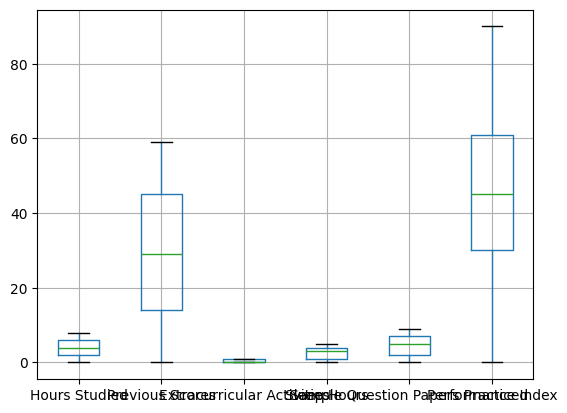

In [7]:
df.boxplot()

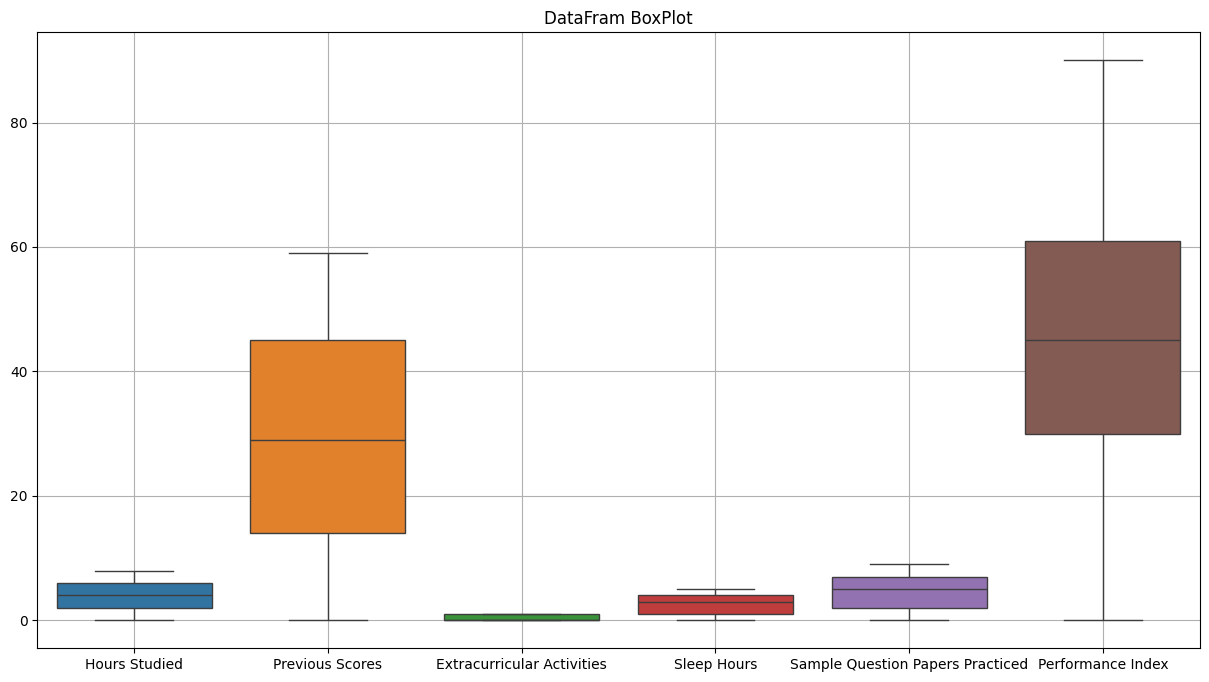

In [8]:
plt.figure(figsize=(15,8))
sns.boxplot(df)
plt.title("DataFram BoxPlot")
plt.grid()
plt.savefig("output/DataFram BoxPlot")
plt.show()

In [9]:
# Using IQR to detect outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
print("Outliers detected:\n", outliers)

Outliers detected:
 Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64


In [10]:
# Optionally remove outliers
data = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,6,59,1,5,1,81
1,3,42,0,0,2,55
2,7,11,1,3,2,35
3,4,12,1,1,2,26
4,6,35,0,4,5,56


# Check for Multicollinearity

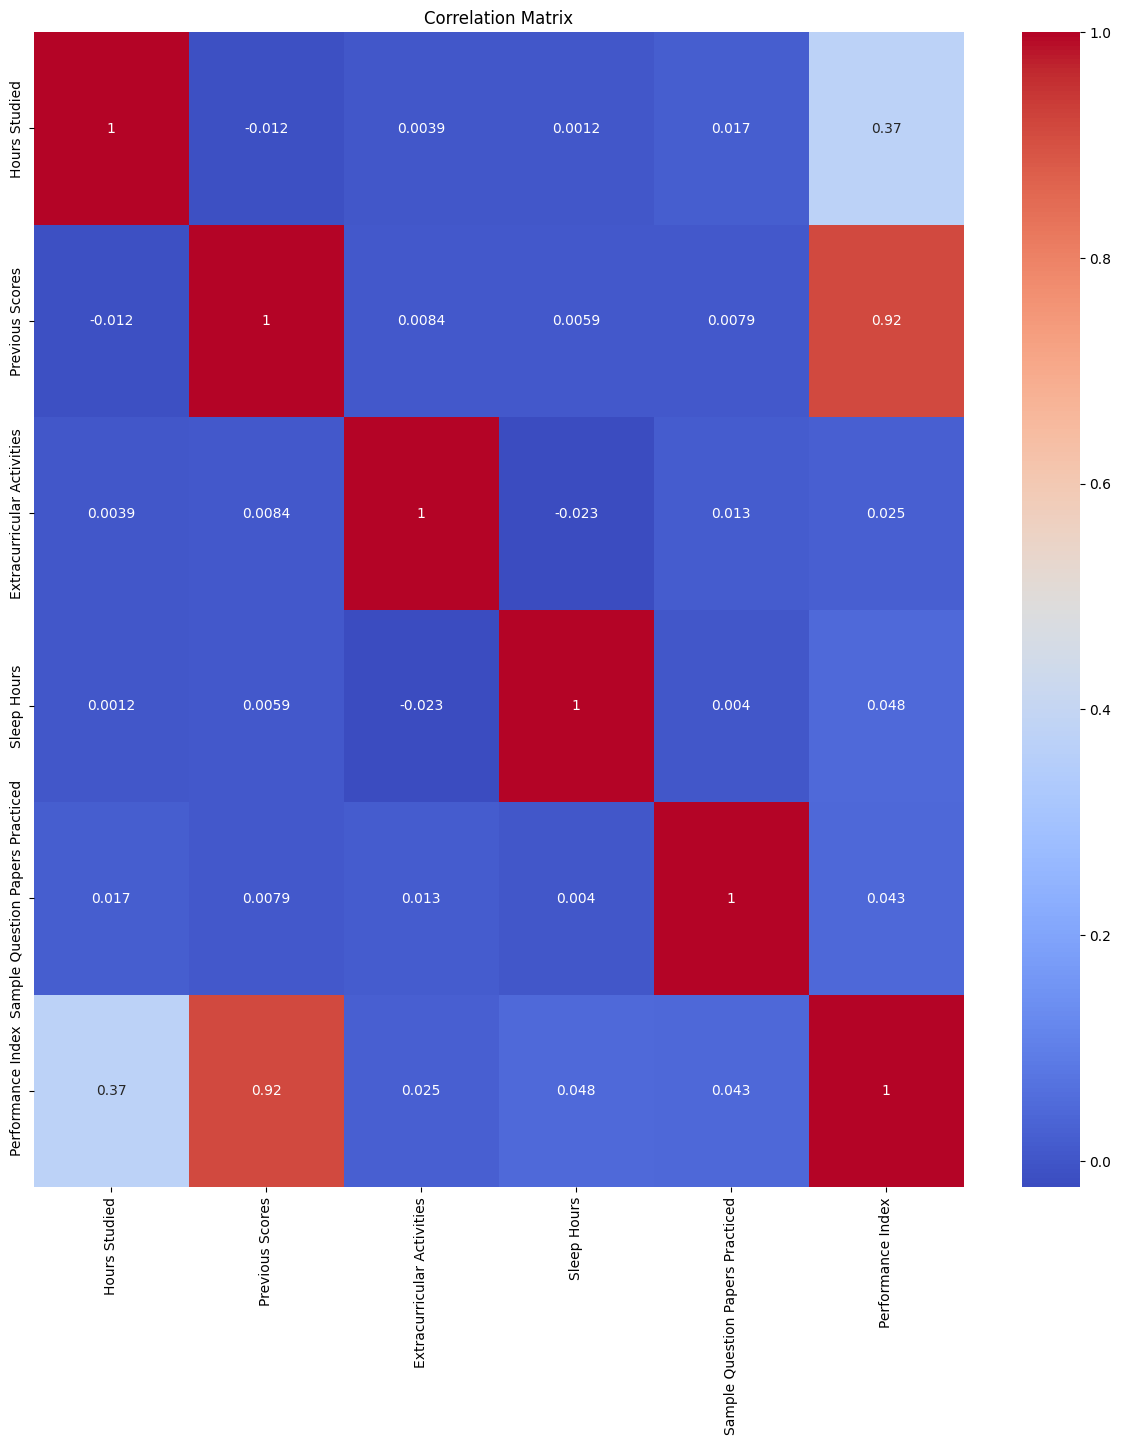

In [11]:
# Compute correlation matrix
fig = plt.figure(figsize=(15,15))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.savefig("output/Correlation Matrix")
plt.show()

# Variance Inflation Factor (VIF)

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


X = data.drop('Performance Index', axis=1)  # Replace 'target' with your dependent variable
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("VIF Results:\n", vif_data)

with pd.ExcelWriter('output/output.xlsx', engine='openpyxl',mode="a") as writer:
    vif_data.to_excel(writer, sheet_name="vif_data")

VIF Results:
                             Feature       VIF
0                     Hours Studied  2.714584
1                   Previous Scores  2.954507
2        Extracurricular Activities  1.819782
3                       Sleep Hours  2.620819
4  Sample Question Papers Practiced  2.848774


# Assumption Testing

In [13]:
with pd.ExcelWriter('output/output.xlsx', engine='openpyxl',mode="a", if_sheet_exists="overlay") as writer:
    X.corr(method="pearson").to_excel(writer, sheet_name="corr")

X.corr()


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
Hours Studied,1.000000,-0.012390,0.003873,0.001245,0.017463
Previous Scores,-0.012390,1.000000,0.008369,0.005944,0.007888
Extracurricular Activities,0.003873,0.008369,1.000000,-0.023284,0.013103
Sleep Hours,0.001245,0.005944,-0.023284,1.000000,0.003990
Sample Question Papers Practiced,0.017463,0.007888,0.013103,0.003990,1.000000


In [14]:
# # Homoscedasticity check
# model = Lasso().fit(X, data['Performance Index'])
# residuals = data['Performance Index'] - model.predict(X)
# sns.residplot(x=model.predict(X), y=residuals, lowess=True, line_kws={'color': 'red'})
# plt.title("Residual Plot")
# plt.savefig("output/Residual Plot")

# plt.show()

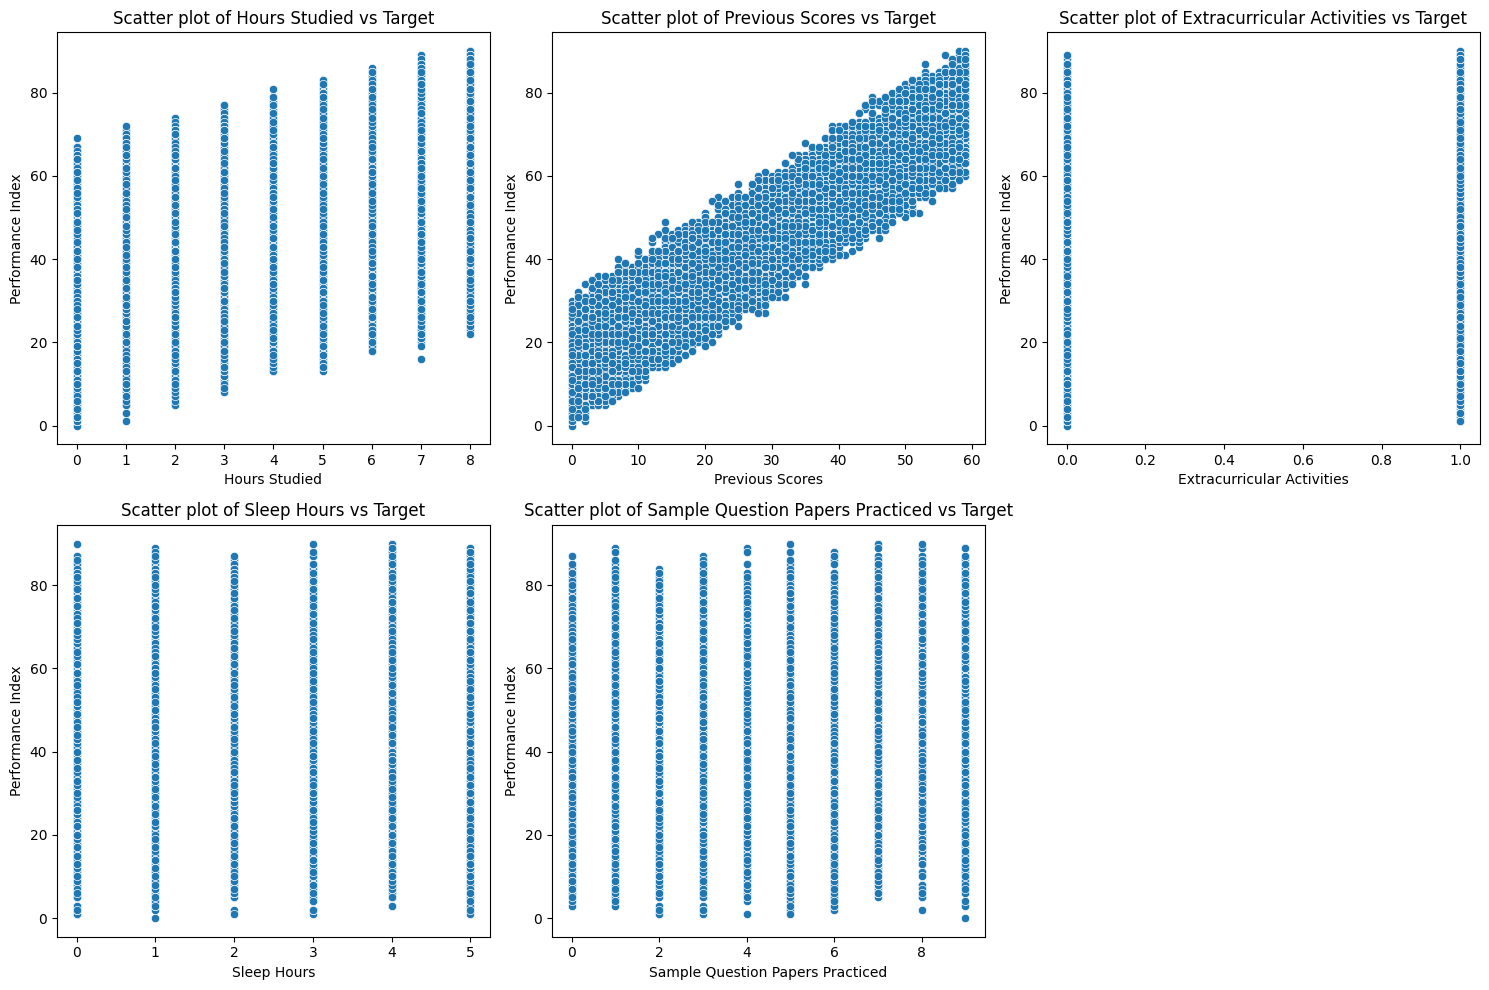

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# تعداد ویژگی‌ها
num_features = len(X.columns)

# تنظیم تعداد سطر و ستون
rows = 2
cols = 3  # یا math.ceil(num_features / rows) برای تنظیم پویا

# اندازه نمودار
fig, axes = plt.subplots(rows, cols, figsize=(15, 10))

# مسطح کردن آرایه محورها برای استفاده در حلقه
axes = axes.flatten()

# رسم نمودارها در هر بخش
for i, feature in enumerate(X.columns):
    sns.scatterplot(ax=axes[i], x=X[feature], y=data['Performance Index'])
    axes[i].set_title(f"Scatter plot of {feature} vs Target")

# حذف نمودارهای خالی (اگر تعداد ویژگی‌ها کمتر از تعداد کل بخش‌ها باشد)
for i in range(num_features, len(axes)):
    fig.delaxes(axes[i])

# ذخیره و نمایش
plt.tight_layout()
plt.savefig("output/Scatter_Plots_2x3.png")
plt.show()


In [16]:
# from statsmodels.api import qqplot
# # Normality of residuals
# qqplot(residuals, line='s')
# plt.title("Q-Q Plot of Residuals")
# plt.savefig("output/Q-Q Plot of Residuals")
# plt.show()

In [17]:
# from scipy.stats import shapiro, normaltest
# _, p_shapiro = shapiro(residuals)
# dw_stat = durbin_watson(residuals)
# _, p_dagostino = normaltest(residuals)

# print(f"Durbin-Watson statistic: {dw_stat:.2f}")
# print(f"Shapiro-Wilk Test p-value: {p_shapiro:.2f}")
# print(f"D'Agostino Test p-value: {p_dagostino:.2f}")


# Feature Engineering

In [18]:
# Step 6: Feature Engineering
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y = data['Performance Index']

# Split Dataset

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, data['Performance Index'], test_size=0.2, random_state=42)

# Fit Linear Regression Model

## lasso


In [20]:
lasso = Lasso(alpha=1)
lasso.fit(X_train, y_train)
# Model evaluation
y_pred = lasso.predict(X_test)
print(f"Root Mean Squared Error: {root_mean_squared_error(y_test, y_pred):.2f}")
print(f"R^2 Score: {r2_score(y_test, y_pred):.4f}")

Root Mean Squared Error: 2.74
R^2 Score: 0.9797


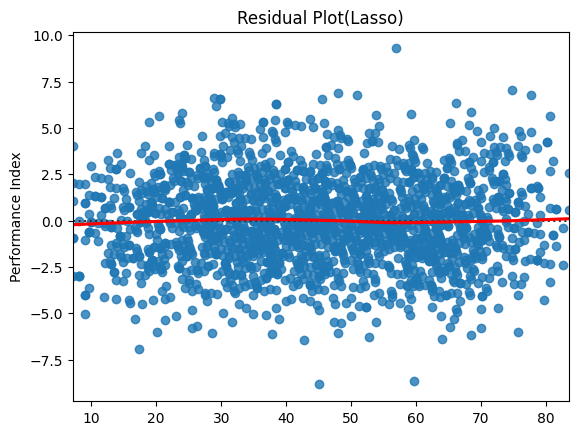

In [21]:
lasso_residuals = y_test - lasso.predict(X_test)
sns.residplot(x=lasso.predict(X_test), y=lasso_residuals, lowess=True, line_kws={'color': 'red'})
plt.title("Residual Plot(Lasso)")
plt.savefig("output/Residual Plot(Lasso)")

plt.show()

In [22]:
_, p_shapiro = shapiro(lasso_residuals)
dw_stat = durbin_watson(lasso_residuals)
_, p_dagostino = normaltest(lasso_residuals)

print(f"Durbin-Watson statistic: {dw_stat:.2f}")
print(f"Shapiro-Wilk Test p-value: {p_shapiro:.2f}")
print(f"D'Agostino Test p-value: {p_dagostino:.2f}")

Durbin-Watson statistic: 1.99
Shapiro-Wilk Test p-value: 0.53
D'Agostino Test p-value: 0.24


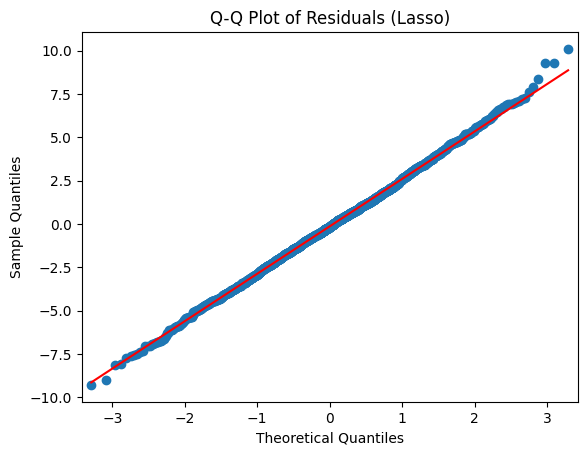

In [23]:
from statsmodels.api import qqplot
# Normality of residuals
qqplot(lasso_residuals, line='s')
plt.title("Q-Q Plot of Residuals (Lasso)")
plt.savefig("output/Q-Q Plot of Residuals(Lasso)")
plt.show()

## Bayesian


In [24]:
br = BayesianRidge()
br.fit(X_train, y_train)
# Model evaluation
y_pred = br.predict(X_test)
print(f"Root Mean Squared Error: {root_mean_squared_error(y_test, y_pred):.2f}")
print(f"R^2 Score: {r2_score(y_test, y_pred):.4f}")

Root Mean Squared Error: 2.02
R^2 Score: 0.9890


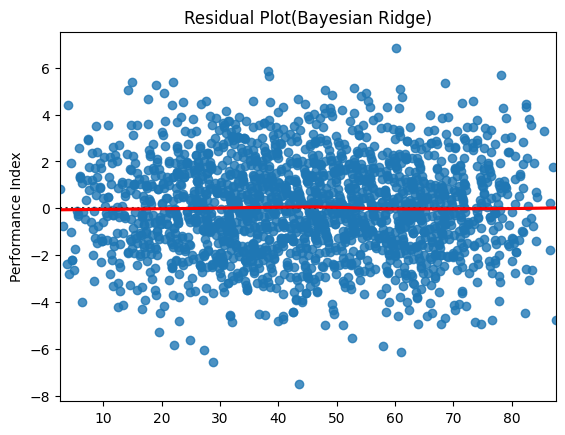

In [25]:
br_residuals = y_test - y_pred
sns.residplot(x=br.predict(X_test), y=br_residuals, lowess=True, line_kws={'color': 'red'})
plt.title("Residual Plot(Bayesian Ridge)")
plt.savefig("output/Residual Plot(Bayesian Ridge)")
plt.show()

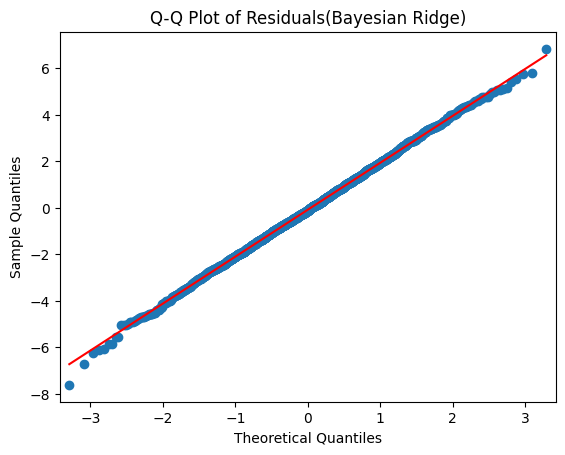

In [26]:
from statsmodels.api import qqplot
# Normality of residuals
qqplot(br_residuals, line='s')
plt.title("Q-Q Plot of Residuals(Bayesian Ridge)")
plt.savefig("output/Q-Q Plot of Residuals(Bayesian Ridge)")
plt.show()

In [27]:
_, p_shapiro = shapiro(br_residuals)
dw_stat = durbin_watson(br_residuals)
_, p_dagostino = normaltest(br_residuals)

print(f"Durbin-Watson statistic: {dw_stat:.2f}")
print(f"Shapiro-Wilk Test p-value: {p_shapiro:.2f}")
print(f"D'Agostino Test p-value: {p_dagostino:.2f}")

Durbin-Watson statistic: 2.05
Shapiro-Wilk Test p-value: 0.98
D'Agostino Test p-value: 0.96


# Fit Non-Linear Regression Model

## SVR

In [28]:
# Fit SVR with RBF kernel
svr_model = SVR(kernel='sigmoid', C=.5, gamma=0.1, epsilon=0.1)
svr_model.fit(X_train, y_train)

SVR(C=0.5, gamma=0.1, kernel='sigmoid')

In [29]:
y_pred = svr_model.predict(X_test)

print(f"Root Mean Squared Error: {root_mean_squared_error(y_test, y_pred):.2f}")
print(f"R^2 Score: {r2_score(y_test, y_pred):.4f}")

Root Mean Squared Error: 5.75
R^2 Score: 0.9109


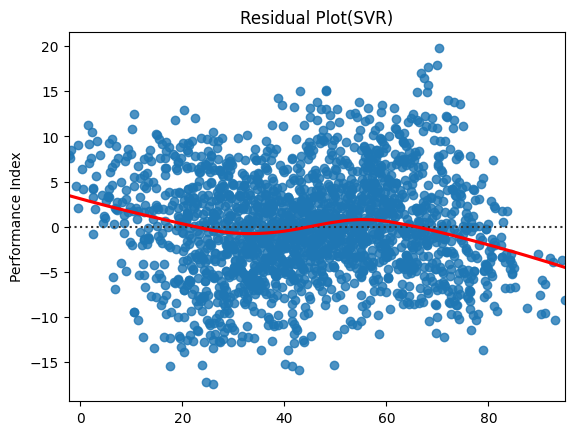

In [30]:
svr_residuals = y_test - y_pred
sns.residplot(x=svr_model.predict(X_test), y=svr_residuals, lowess=True, line_kws={'color': 'red'})
plt.title("Residual Plot(SVR)")
plt.savefig("output/Residual Plot(SVR)")
plt.show()

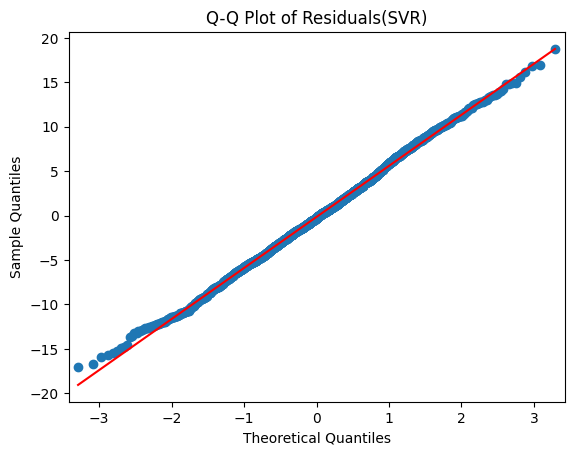

In [31]:
from statsmodels.api import qqplot
# Normality of residuals
qqplot(svr_residuals, line='s')
plt.title("Q-Q Plot of Residuals(SVR)")
plt.savefig("output/Q-Q Plot of Residuals(SVR)")
plt.show()

In [32]:
_, p_shapiro = shapiro(svr_residuals)
dw_stat = durbin_watson(svr_residuals)
_, p_dagostino = normaltest(svr_residuals)

print(f"Durbin-Watson statistic: {dw_stat:.2f}")
print(f"Shapiro-Wilk Test p-value: {p_shapiro:.2f}")
print(f"D'Agostino Test p-value: {p_dagostino:.2f}")

Durbin-Watson statistic: 2.03
Shapiro-Wilk Test p-value: 0.05
D'Agostino Test p-value: 0.06


## Decision Tree Regressor

In [33]:
# Fit a decision tree regressor
dtr_model = DecisionTreeRegressor(max_depth=100, random_state=0)
dtr_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=100, random_state=0)

In [34]:
# Predict
# X_test = np.linspace(0, 5, 100).reshape(-1, 1)
y_pred = dtr_model.predict(X_test)
print(f"Root Mean Squared Error: {root_mean_squared_error(y_test, y_pred):.2f}")
print(f"R^2 Score: {r2_score(y_test, y_pred):.4f}")



Root Mean Squared Error: 2.98
R^2 Score: 0.9760


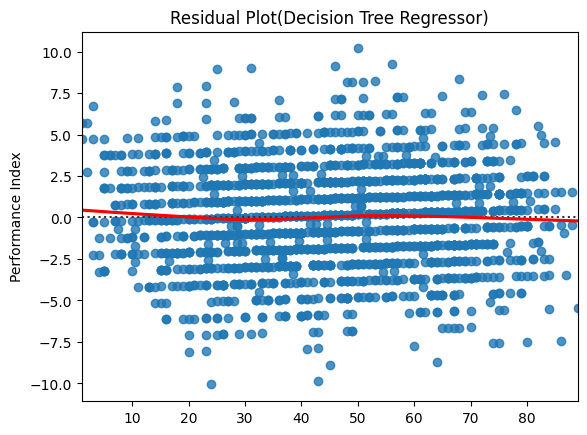

In [35]:
dtr_residuals = y_test - y_pred
sns.residplot(x=dtr_model.predict(X_test), y=dtr_residuals, lowess=True, line_kws={'color': 'red'})
plt.title("Residual Plot(Decision Tree Regressor)")
plt.savefig("output/Residual Plot(Decision Tree Regressor)")
plt.show()

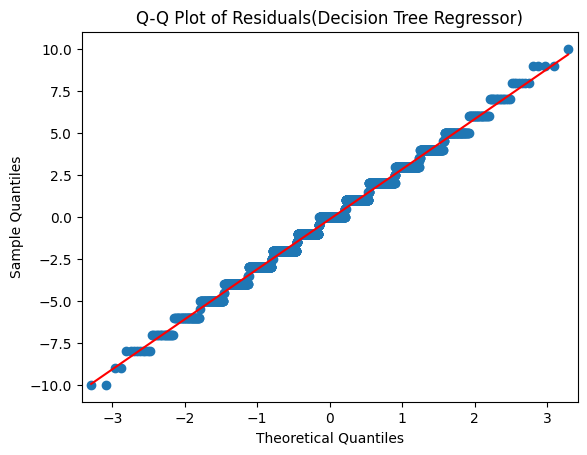

In [36]:
from statsmodels.api import qqplot
# Normality of residuals
qqplot(dtr_residuals, line='s')
plt.title("Q-Q Plot of Residuals(Decision Tree Regressor)")
plt.savefig("output/Q-Q Plot of Residuals(Decision Tree Regressor)")
plt.show()

In [37]:
_, p_shapiro = shapiro(dtr_residuals)
dw_stat = durbin_watson(dtr_residuals)
_, p_dagostino = normaltest(dtr_residuals)

print(f"Durbin-Watson statistic: {dw_stat:.2f}")
print(f"Shapiro-Wilk Test p-value: {p_shapiro:.2f}")
print(f"D'Agostino Test p-value: {p_dagostino:.2f}")

Durbin-Watson statistic: 2.03
Shapiro-Wilk Test p-value: 0.00
D'Agostino Test p-value: 1.00
